In [1]:
import OGRePy as T
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.2.0 (2024-09-15)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="C:/Users/User/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="C:/Users/User/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///C:/Users/User/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

**OGRePy**: Could not check for updates automatically: `<urlopen error [Errno 11001] getaddrinfo failed>`. Please visit <https://pypi.org/project/OGRePy/> to check manually.

In [2]:
from OGRePy.abc import t,phi,theta,rho,P,K,alpha,beta,lamda,mu,nu
r = T.sym("r", nonnegative=True)
Spherical = T.Coordinates(t, r, theta, phi)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

In [4]:
a_t=T.func("a")(t)


a(t)

In [5]:
rho_t=T.func("rho")(t)

\rho(t)

In [6]:
P_t=T.func("P")(t)

P(t)

In [7]:
FLRW=T.Metric(coords=Spherical,components=T.diag(-1,a_t**2 *(1/(1-K*r**2)),a_t**2*r**2,a_t**2*r**2 *T.s.sin(theta) ** 2))

$$g{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}-1 & 0 & 0 & 0\\0 & \frac{a^{2}}{- K r^{2} + 1} & 0 & 0\\0 & 0 & a^{2} r^{2} & 0\\0 & 0 & 0 & a^{2} r^{2} \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

In [8]:
InverseFLRW=T.Metric(coords=Spherical,components=T.diag(-1,1/(a_t**2 *(1/(1-K*r**2))),1/(a_t**2*r**2),1/(a_t**2*r**2 *T.s.sin(theta) ** 2)))

$$g{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}-1 & 0 & 0 & 0\\0 & \frac{- K r^{2} + 1}{a^{2}} & 0 & 0\\0 & 0 & \frac{1}{a^{2} r^{2}} & 0\\0 & 0 & 0 & \frac{1}{a^{2} r^{2} \sin^{2}{\left(\theta \right)}}\end{matrix}\right)$$

In [9]:
FLRW.show(indices=(1,1))

$$g{}^{\mu}{}^{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}-1 & 0 & 0 & 0\\0 & \frac{- K r^{2} + 1}{a^{2}} & 0 & 0\\0 & 0 & \frac{1}{a^{2} r^{2}} & 0\\0 & 0 & 0 & \frac{1}{a^{2} r^{2} \sin^{2}{\left(\theta \right)}}\end{matrix}\right)$$

In [10]:
~FLRW

$$\begin{align*}
    g{}_{t}{}_{t} &= -1 \\
    g{}_{r}{}_{r} &= \frac{a^{2}}{- K r^{2} + 1} \\
    g{}_{\theta}{}_{\theta} &= a^{2} r^{2} \\
    g{}_{\phi}{}_{\phi} &= a^{2} r^{2} \sin^{2}{\left(\theta \right)} 
\end{align*}$$

In [11]:
FLRW.line_element()

\mathrm{d}\phi**2*r**2*a(t)**2*sin(\theta)**2 + \mathrm{d}\theta**2*r**2*a(t)**2 + \mathrm{d}r**2*a(t)**2/(-K*r**2 + 1) - \mathrm{d}t**2

In [54]:
print(type(FLRW.components()))       # Should indicate a tensor type
print(type(FLRW.christoffel()))      # Should indicate a tensor type
print(type(FLRW.ricci_tensor()))            # Should indicate a tensor type
print(type(FLRW.einstein()))         # Should indicate a tensor type


**OGRePy**: Using default coordinate system `Spherical` and default index configuration (-1, -1).

<class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>
<class 'OGRePy._core.Christoffel'>
<class 'OGRePy._core.RicciTensor'>
<class 'OGRePy._core.Einstein'>


In [55]:
print(dir(FLRW))          # Lists all attributes and methods of FLRW
help(FLRW.components)     # Provides documentation for the components method


['__add__', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__invert__', '__le__', '__lt__', '__matmul__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__pos__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmatmul__', '__rmul__', '__rsub__', '__setattr__', '__sizeof__', '__slotnames__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_calc_letters', '_calc_representation', '_check_index_letters', '_christoffel', '_cleanup_notation', '_components', '_default_coords', '_default_indices', '_einstein', '_geodesic_from_christoffel', '_geodesic_from_lagrangian', '_geodesic_time_param', '_get_components', '_kretschmann', '_lagrangian', '_metric', '_process_show_list', '_repr_markdown_', '_ricci_scalar', '_ricci_tensor', '_riemann', '_store_components', '_symbol

In [56]:
# Call the components() method to get the metric tensor components
g = FLRW.components()

# Verify the type
print(type(g))  # Should output: <class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


**OGRePy**: Using default coordinate system `Spherical` and default index configuration (-1, -1).

<class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


In [61]:
# Accessing metric tensor components
g_tt = g[0, 0]
g_rr = g[1, 1]
g_theta_theta = g[2, 2]
g_phi_phi = g[3, 3]




r**2*a(t)**2*sin(\theta)**2

In [77]:
g[1,1]

a(t)**2/(-K*r**2 + 1)

In [62]:
# Calculate Christoffel symbols by calling the method
Gamma = FLRW.christoffel()


$$\Gamma{}^{\mu}{}_{\nu}{}_{\rho}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}\left(\begin{matrix}0 & 0 & 0 & 0\\0 & - \frac{\partial_{t} a a}{K r^{2} - 1} & 0 & 0\\0 & 0 & \partial_{t} a a r^{2} & 0\\0 & 0 & 0 & \partial_{t} a a r^{2} \sin^{2}{\left(\theta \right)}\end{matrix}\right) & \left(\begin{matrix}0 & \frac{\partial_{t} a}{a} & 0 & 0\\\frac{\partial_{t} a}{a} & - \frac{K r}{K r^{2} - 1} & 0 & 0\\0 & 0 & K r^{3} - r & 0\\0 & 0 & 0 & r \left(K r^{2} - 1\right) \sin^{2}{\left(\theta \right)}\end{matrix}\right) & \left(\begin{matrix}0 & 0 & \frac{\partial_{t} a}{a} & 0\\0 & 0 & \frac{1}{r} & 0\\\frac{\partial_{t} a}{a} & \frac{1}{r} & 0 & 0\\0 & 0 & 0 & - \frac{\sin{\left(2 \theta \right)}}{2}\end{matrix}\right) & \left(\begin{matrix}0 & 0 & 0 & \frac{\partial_{t} a}{a}\\0 & 0 & 0 & \frac{1}{r}\\0 & 0 & 0 & \frac{1}{\tan{\left(\theta \right)}}\\\frac{\partial_{t} a}{a} & \frac{1}{r} & \frac{1}{\tan{\left(\theta \right)}} & 0\end{matrix}\right)\end{matrix}\right)$$

In [63]:
# Call the components() method on the Christoffel object
Gamma_components = Gamma.components()

# Verify the type
print(type(Gamma_components))  # Should output: <class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


**OGRePy**: Using default coordinate system `Spherical` and default index configuration (1, -1, -1).

<class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


In [70]:
# Example: Access Γ^1_{23}
Gamma_022 = Gamma_components[0, 2, 2]
Gamma_022




r**2*a(t)*Derivative(a(t), t)

In [12]:
~FLRW.christoffel()

$$\begin{align*}
    \Gamma{}^{t}{}_{r}{}_{r} &= - \frac{\partial_{t} a a}{K r^{2} - 1} \\
    \Gamma{}^{t}{}_{\theta}{}_{\theta} &= \partial_{t} a a r^{2} \\
    \Gamma{}^{t}{}_{\phi}{}_{\phi} &= \partial_{t} a a r^{2} \sin^{2}{\left(\theta \right)} \\
    \Gamma{}^{r}{}_{t}{}_{r} = \Gamma{}^{r}{}_{r}{}_{t} = \Gamma{}^{\theta}{}_{t}{}_{\theta} = \Gamma{}^{\theta}{}_{\theta}{}_{t} = \Gamma{}^{\phi}{}_{t}{}_{\phi} = \Gamma{}^{\phi}{}_{\phi}{}_{t} &= \frac{\partial_{t} a}{a} \\
    \Gamma{}^{r}{}_{r}{}_{r} &= - \frac{K r}{K r^{2} - 1} \\
    \Gamma{}^{r}{}_{\theta}{}_{\theta} &= K r^{3} - r \\
    \Gamma{}^{r}{}_{\phi}{}_{\phi} &= r \left(K r^{2} - 1\right) \sin^{2}{\left(\theta \right)} \\
    \Gamma{}^{\theta}{}_{r}{}_{\theta} = \Gamma{}^{\theta}{}_{\theta}{}_{r} = \Gamma{}^{\phi}{}_{r}{}_{\phi} = \Gamma{}^{\phi}{}_{\phi}{}_{r} &= \frac{1}{r} \\
    \Gamma{}^{\theta}{}_{\phi}{}_{\phi} &= - \frac{\sin{\left(2 \theta \right)}}{2} \\
    \Gamma{}^{\phi}{}_{\theta}{}_{\phi} = \Gamma{}^{\phi}{}_{\phi}{}_{\theta} &= \frac{1}{\tan{\left(\theta \right)}} 
\end{align*}$$

In [71]:
# Calculate Ricci tensor by calling the method
Ricci = FLRW.ricci_tensor()


$$R{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}- \frac{3 \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a}{a} & 0 & 0 & 0\\0 & \frac{- 2 K - 2 \partial_{t} a^{2} - a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a}{K r^{2} - 1} & 0 & 0\\0 & 0 & r^{2} \left(2 K + 2 \partial_{t} a^{2} + a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right) & 0\\0 & 0 & 0 & r^{2} \left(2 K + 2 \partial_{t} a^{2} + a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right) \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

In [72]:
# Call the components() method on the Ricci tensor object
Ricci_components = Ricci.components()

# Verify the type
print(type(Ricci_components))  # Should output: <class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


**OGRePy**: Using default coordinate system `Spherical` and default index configuration (-1, -1).

<class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


In [73]:


# Example: Access R_rr
R_rr = Ricci_components[1, 1]
R_rr


(-2*K - a(t)*Derivative(a(t), (t, 2)) - 2*Derivative(a(t), t)**2)/(K*r**2 - 1)

In [13]:
~FLRW.ricci_tensor()

$$\begin{align*}
    R{}_{t}{}_{t} &= - \frac{3 \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a}{a} \\
    R{}_{r}{}_{r} &= \frac{- 2 K - 2 \partial_{t} a^{2} - a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a}{K r^{2} - 1} \\
    R{}_{\theta}{}_{\theta} &= r^{2} \left(2 K + 2 \partial_{t} a^{2} + a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right) \\
    R{}_{\phi}{}_{\phi} &= r^{2} \left(2 K + 2 \partial_{t} a^{2} + a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right) \sin^{2}{\left(\theta \right)} 
\end{align*}$$

In [14]:
~FLRW.ricci_scalar()

$$\begin{align*}
    R &= \frac{6 \left(K + \partial_{t} a^{2} + a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right)}{a^{2}} 
\end{align*}$$

In [74]:
# Calculate Einstein tensor by calling the method
Einstein = FLRW.einstein()


$$G{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}\frac{3 \left(K + \partial_{t} a^{2}\right)}{a^{2}} & 0 & 0 & 0\\0 & \frac{K + \partial_{t} a^{2} + 2 a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a}{K r^{2} - 1} & 0 & 0\\0 & 0 & r^{2} \left(- K - \partial_{t} a^{2} - 2 a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right) & 0\\0 & 0 & 0 & r^{2} \left(- K - \partial_{t} a^{2} - 2 a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right) \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

In [75]:
# Call the components() method on the Einstein tensor object
Einstein_components = Einstein.components()

# Verify the type
print(type(Einstein_components))  # Should output: <class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


**OGRePy**: Using default coordinate system `Spherical` and default index configuration (-1, -1).

<class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'>


In [78]:
G_tt=Einstein_components[0,0]
G_tt

3*(K + Derivative(a(t), t)**2)/a(t)**2

In [76]:


# Example: Access G_rr
G_rr = Einstein_components[1, 1]
G_rr


(K + 2*a(t)*Derivative(a(t), (t, 2)) + Derivative(a(t), t)**2)/(K*r**2 - 1)

In [15]:
~FLRW.einstein()

$$\begin{align*}
    G{}_{t}{}_{t} &= \frac{3 \left(K + \partial_{t} a^{2}\right)}{a^{2}} \\
    G{}_{r}{}_{r} &= \frac{K + \partial_{t} a^{2} + 2 a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a}{K r^{2} - 1} \\
    G{}_{\theta}{}_{\theta} &= r^{2} \left(- K - \partial_{t} a^{2} - 2 a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right) \\
    G{}_{\phi}{}_{\phi} &= r^{2} \left(- K - \partial_{t} a^{2} - 2 a \frac{\mathrm{d}}{\mathrm{d} t} \partial_{t} a\right) \sin^{2}{\left(\theta \right)} 
\end{align*}$$

In [16]:

~(T.PartialD(mu) @ FLRW(alpha,beta) - FLRW.christoffel(lamda,mu,alpha)@FLRW(lamda,beta)-FLRW.christoffel(lamda,mu,beta)@FLRW(lamda,alpha))

$$\text{No non-zero elements.}$$

In [17]:
RestVelocity=T.Tensor(metric=FLRW,coords=Spherical,indices=(-1,),components=[1,0,0,0],symbol="u")

$$u{}_{\mu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}1\\0\\0\\0\end{matrix}\right)$$

In [ ]:
rho_t=T.func("rho")(t)

In [ ]:
P_t=T.func("P")(t)

In [18]:
PerfectFluidFLRW=T.calc(formula=(rho_t+P_t)*RestVelocity(mu)@RestVelocity(nu)+P_t*FLRW(mu,nu),symbol="T")

$$T{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}\rho{\left(t \right)} & 0 & 0 & 0\\0 & - \frac{P a^{2}}{K r^{2} - 1} & 0 & 0\\0 & 0 & P a^{2} r^{2} & 0\\0 & 0 & 0 & P a^{2} r^{2} \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

In [19]:
~(T.CovariantD(mu)@PerfectFluidFLRW(mu,nu))

$$\begin{align*}
    \nabla{}_{\mu} T{}^{\mu}{}_{t} &= \frac{- \partial_{t} \rho{\left(t \right)} a - 3 \partial_{t} a \left(P + \rho{\left(t \right)}\right)}{a} 
\end{align*}$$

In [22]:
t, r, theta, phi = sp.symbols('t r theta phi')
a = sp.Function('a')
K = sp.symbols('K')
mu=sp.symbols("mu")

rho = sp.Function('rho')
P = sp.Function('P')

P

In [21]:
Conservation_Equation=sp.Eq(sp.diff(rho(t),t)+ 3*sp.diff(a(t),t)/a(t) * (P(t)+rho(t)),0)
Conservation_Equation

Eq(3*(P(t) + rho(t))*Derivative(a(t), t)/a(t) + Derivative(rho(t), t), 0)

In [23]:
Equation_of_state=sp.Eq(P(t),mu*rho(t))
Equation_of_state

Eq(P(t), mu*rho(t))

In [24]:
Equation_of_state=sp.Eq(P(t),Equation_of_state.rhs.subs(mu,0))
Equation_of_state

Eq(P(t), 0)

In [25]:
Conservation_Equation=sp.Eq(Conservation_Equation.lhs.subs(P(t),0),0)
Conservation_Equation

Eq(Derivative(rho(t), t) + 3*rho(t)*Derivative(a(t), t)/a(t), 0)

In [79]:
EFE_1=sp.Eq(G_tt,8*sp.pi*rho(t))

Eq(3*(K + Derivative(a(t), t)**2)/a(t)**2, 8*pi*rho(t))

In [32]:
EFE_1_Solution=sp.solve(EFE_1,rho(t))[0]
EFE_1_Solution

3*(K + Derivative(a(t), t)**2)/(8*pi*a(t)**2)

In [33]:
Conservation_Equation=sp.Eq(Conservation_Equation.lhs.subs(rho(t),EFE_1_Solution),0)

Eq(9*(K + Derivative(a(t), t)**2)*Derivative(a(t), t)/(8*pi*a(t)**3) + Derivative(3*(K + Derivative(a(t), t)**2)/(8*pi*a(t)**2), t), 0)

In [34]:
Conservation_Equation=sp.simplify(Conservation_Equation)

Eq((9*(K + Derivative(a(t), t)**2)*Derivative(a(t), t)/8 + pi*(-3*(K + Derivative(a(t), t)**2)*Derivative(a(t), t)/(4*pi*a(t)**3) + 3*Derivative(a(t), t)*Derivative(a(t), (t, 2))/(4*pi*a(t)**2))*a(t)**3)/(pi*a(t)**3), 0)

In [35]:
Conservation_Equation_1=sp.Eq(Conservation_Equation.lhs.subs(K,-1),0)
Conservation_Equation_1

Eq((pi*(-3*(Derivative(a(t), t)**2 - 1)*Derivative(a(t), t)/(4*pi*a(t)**3) + 3*Derivative(a(t), t)*Derivative(a(t), (t, 2))/(4*pi*a(t)**2))*a(t)**3 + 9*(Derivative(a(t), t)**2 - 1)*Derivative(a(t), t)/8)/(pi*a(t)**3), 0)

In [44]:
Conservation_Equation_1=sp.simplify(Conservation_Equation_1)
print("The equation for K=-1 is",)
Conservation_Equation_1

The equation for K=-1 is


Eq(3*(2*a(t)*Derivative(a(t), (t, 2)) + Derivative(a(t), t)**2 - 1)*Derivative(a(t), t)/(8*pi*a(t)**3), 0)

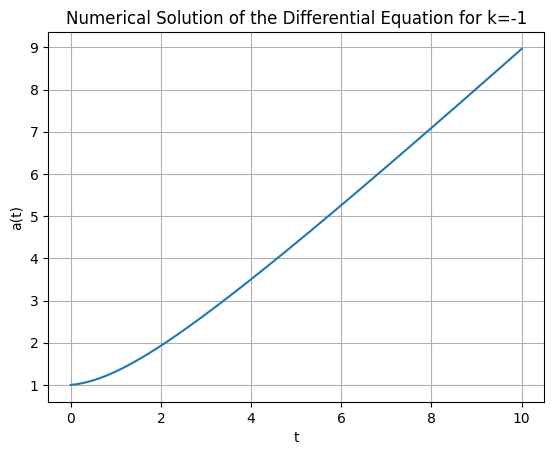

In [47]:
# Define the ODE system
def ode_system(t, y):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = -0.5 * (y2**2) / y1 + 1/(2*y1)
    return [dy1_dt, dy2_dt]

# Initial conditions
y1_0 = 1.0  # Initial value for a(t)
y2_0 = 0.1  # Initial value for a'(t)
y0 = [y1_0, y2_0]

# Time span for the solution
t_span = (0, 10)
t_eval = np.linspace(*t_span, 400)

# Solve the system of ODEs
sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)

# Extract the solution
a_vals = sol.y[0]  # y1 = a(t) values

# Plot the solution for a(t)
plt.plot(sol.t, a_vals)
plt.xlabel('t')
plt.ylabel('a(t)')
plt.title('Numerical Solution of the Differential Equation for k=-1')
plt.grid(True)
plt.show()

In [37]:
Conservation_Equation_2=sp.Eq(Conservation_Equation.lhs.subs(K,0),0)
Conservation_Equation_2

Eq((pi*(3*Derivative(a(t), t)*Derivative(a(t), (t, 2))/(4*pi*a(t)**2) - 3*Derivative(a(t), t)**3/(4*pi*a(t)**3))*a(t)**3 + 9*Derivative(a(t), t)**3/8)/(pi*a(t)**3), 0)

In [45]:
Conservation_Equation_2=sp.simplify(Conservation_Equation_2)
print("The equation for K=0 is",)
Conservation_Equation_2

The equation for K=0 is


Eq(3*(2*a(t)*Derivative(a(t), (t, 2)) + Derivative(a(t), t)**2)*Derivative(a(t), t)/(8*pi*a(t)**3), 0)

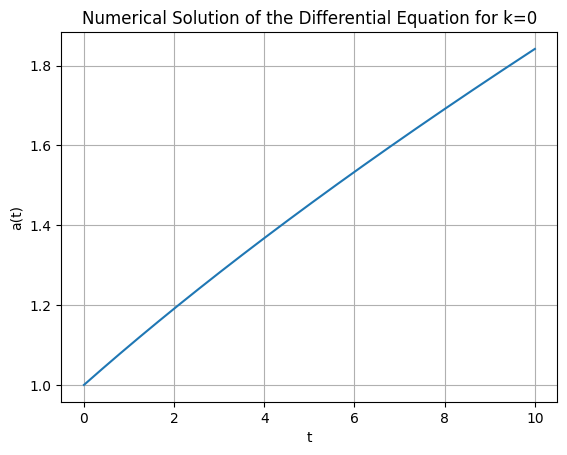

In [48]:
# Define the ODE system
def ode_system(t, y):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = -0.5 * (y2**2) / y1
    return [dy1_dt, dy2_dt]

# Initial conditions
y1_0 = 1.0  # Initial value for a(t)
y2_0 = 0.1  # Initial value for a'(t)
y0 = [y1_0, y2_0]

# Time span for the solution
t_span = (0, 10)
t_eval = np.linspace(*t_span, 400)

# Solve the system of ODEs
sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)

# Extract the solution
a_vals = sol.y[0]  # y1 = a(t) values

# Plot the solution for a(t)
plt.plot(sol.t, a_vals)
plt.xlabel('t')
plt.ylabel('a(t)')
plt.title('Numerical Solution of the Differential Equation for k=0')
plt.grid(True)
plt.show()

In [39]:
Conservation_Equation_3=sp.Eq(Conservation_Equation.lhs.subs(K,1),0)
Conservation_Equation_3

Eq((pi*(-3*(Derivative(a(t), t)**2 + 1)*Derivative(a(t), t)/(4*pi*a(t)**3) + 3*Derivative(a(t), t)*Derivative(a(t), (t, 2))/(4*pi*a(t)**2))*a(t)**3 + 9*(Derivative(a(t), t)**2 + 1)*Derivative(a(t), t)/8)/(pi*a(t)**3), 0)

In [46]:
Conservation_Equation_3=sp.simplify(Conservation_Equation_3)
print("The equation for K=1 is",)
Conservation_Equation_3

The equation for K=1 is


Eq(3*(2*a(t)*Derivative(a(t), (t, 2)) + Derivative(a(t), t)**2 + 1)*Derivative(a(t), t)/(8*pi*a(t)**3), 0)

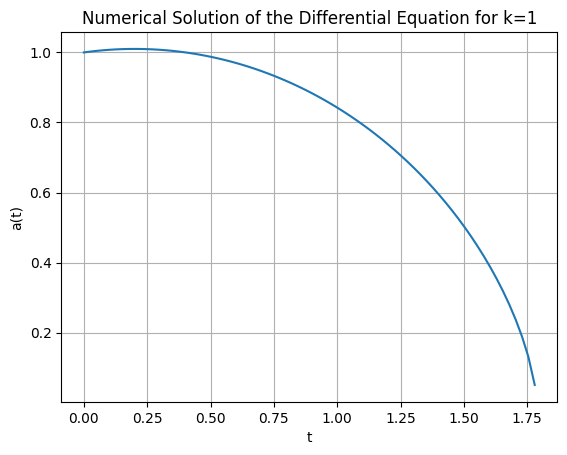

In [49]:
# Define the ODE system
def ode_system(t, y):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = -0.5 * (y2**2) / y1 - 1/(2*y1)
    return [dy1_dt, dy2_dt]

# Initial conditions
y1_0 = 1.0  # Initial value for a(t)
y2_0 = 0.1  # Initial value for a'(t)
y0 = [y1_0, y2_0]

# Time span for the solution
t_span = (0, 10)
t_eval = np.linspace(*t_span, 400)

# Solve the system of ODEs
sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)

# Extract the solution
a_vals = sol.y[0]  # y1 = a(t) values

# Plot the solution for a(t)
plt.plot(sol.t, a_vals)
plt.xlabel('t')
plt.ylabel('a(t)')
plt.title('Numerical Solution of the Differential Equation for k=1')
plt.grid(True)